In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

In [2]:
elasticity = pd.read_csv("elasticity_total.csv")

In [3]:
elasticity.head()

,asset,shock,elasticity
0,-3.000000,1.0,-12.107001
1,-2.888889,1.0,-9.566653
2,-2.777778,1.0,-8.156620
3,-2.666667,1.0,-7.244811
4,-2.555556,1.0,-6.355943


In [4]:
def create_grid(df,x,y,z):
    # 2D-arrays from DataFrame
    x1 = np.linspace(df[x].min(), df[x].max(), len(df[x].unique()))

    y1 = np.linspace(df[y].min(), df[y].max(), len(df[y].unique()))


    x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
    z2 = griddata((df[x], df[y]), df[z], (x2, y2), method='linear')
    
    return x2, y2, z2

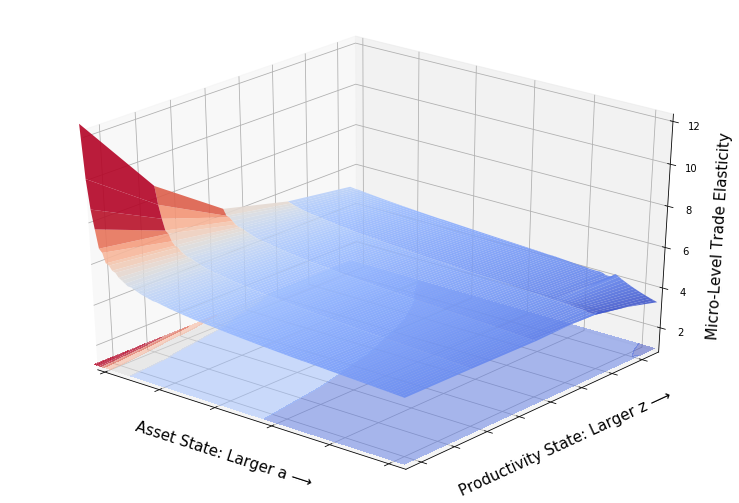

In [60]:
x, y, z = create_grid(elasticity,"asset","shock","elasticity")

fig = plt.figure(figsize = (13,9))

ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, -1*z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=3, vmax=7),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = .40

ax.contourf(x, y, -1*z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=3, vmax=8), 
                  alpha = 0.50, linestyles = "dashed")

ax.view_init(30,310)
ax.set_xlim(-2.05,8.35)
ax.set_ylim(0.85,4.7)
ax.set_zlim(1.0)

ax.set_yticklabels([])
ax.set_xticklabels([])

ax.set_ylabel("\n Productivity State: Larger z ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n Micro-Level Trade Elasticity ", fontsize = 15)

plt.savefig("../notes/figures/micro-elasticity.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

In [7]:
trade_share = pd.read_csv("trade_share.csv")

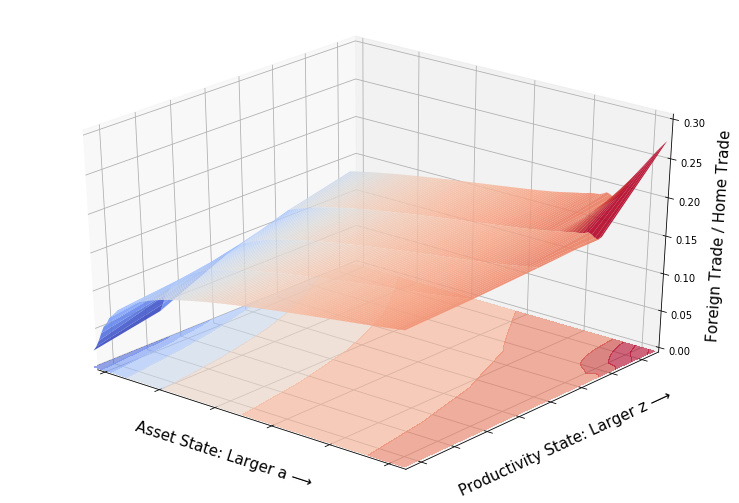

In [61]:
x, y, z = create_grid(trade_share,"asset","shock","elasticity")

fig = plt.figure(figsize = (13,9))

ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=0.02, vmax=0.20),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = -0.02

ax.contourf(x, y, z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=0, vmax=0.20), 
                  alpha = 0.60, linestyles = "dashed")

ax.view_init(30,310)
ax.set_xlim(-2.05,8.35)
ax.set_ylim(0.85,4.7)
ax.set_zlim(0.0,.30)

ax.set_yticklabels([])
ax.set_xticklabels([])

ax.set_ylabel("\n Productivity State: Larger z ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n Foreign Trade / Home Trade ", fontsize = 15)

plt.savefig("../notes/figures/trade-share.pdf", bbox_inches = "tight", dip = 3600)

plt.show()